# Mini Project 1: COMP 551 project - Beast Cancer Dataset

### by GROUP 97 (Nikhil Podila, Shantanil Bagchi and Surya Penmesta)

Dataset 2 (Breast Cancer Diagnosis):

– Link:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

– This is a dataset where the goal is to predict whether a tumour is malignant or benign based on various properties.

– Note: We will use the data folder titles breast-cancer-wisconsin.data for this project.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Task 1: Acquire, preprocess, and analyze the data

The essential subtasks for this part of the project are:
1. Download the datasets (noting the correct subsets to use, as discussed above).
2. Load the datasets into numpy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
3. Clean the data. Are there any missing or malformed features? Are there are other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report.
4. Compute some statistics on the data. E.g., what are the distributions of the positive vs. negative classes, what
are the distributions of some of the numerical features?

### Reading Dataset: Breast Cancer Diagnosis

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)
data.columns=['Id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data2 = data.apply(pd.to_numeric, errors='coerce') #Convert argument to numeric type and invalid parsing is set as NaN
data = data2.dropna() #Rewrrite previous data entry with new complete data 

#Patient Number is not required
del data['Id number']

# Display the first few records
data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


### Remove outlier data

Using interquartile range to calculate and remove outliers.
Using Features "Bare Nuclei" and "Cell Size" to remove outliers

In [3]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "Bare Nuclei"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range =   (Q3 - Q1)

# Outliers in data
num_data = data[((data["Bare Nuclei"] < (Q1 - outlier_range)) | (data["Bare Nuclei"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["Bare Nuclei"] < (Q1 - outlier_range)) | (data["Bare Nuclei"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  0


In [4]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "Uniformity of Cell Size"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range =   (Q3 - Q1)

# Outliers in data
num_data = data[((data["Uniformity of Cell Size"] < (Q1 - outlier_range)) | (data["Uniformity of Cell Size"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["Uniformity of Cell Size"] < (Q1 - outlier_range)) | (data["Uniformity of Cell Size"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  67


### Update target variable from Categorical (2,4) to Categorical (0,1)

In [5]:
#Using lambda function to change values in the Class column
data["Class"]=1*(data["Class"]>3)

#Display the changed records
data[["Class"]].head()

,Class
0,0
1,0
2,0
3,0
4,0


### Checking number of total breast cancer data and percentage of benign data

In [6]:
#Check number of entries in a cloumn
num_of_patients = data.shape[0]

# Number of benign breast cancer data
benign_number=data.loc[(data['Class']==0)] #Accessing Column using label
number_benign=benign_number.shape[0] #Returns Dimensionality of DataFrame in tuple format

# Number of malignant breast cancer data
malignant_number=data.loc[(data['Class']==1)]
number_malignant=malignant_number.shape[0]

# Percentage of benign Class data
benign_percentage = number_benign*100/num_of_patients

# Print the results
print("Total number of patients: {}".format(num_of_patients))
print("Number of benign tumor patient: {}".format(number_benign))
print("Number of malignant tumor patient: {}".format(number_malignant))
print("Percentage of benign tumor patient: {:.2f}%".format(benign_percentage))

Total number of patients: 616
Number of benign tumor patient: 444
Number of malignant tumor patient: 172
Percentage of benign tumor patient: 72.08%


### Plotting Pie Chart to show distribution of benign and malignant classes

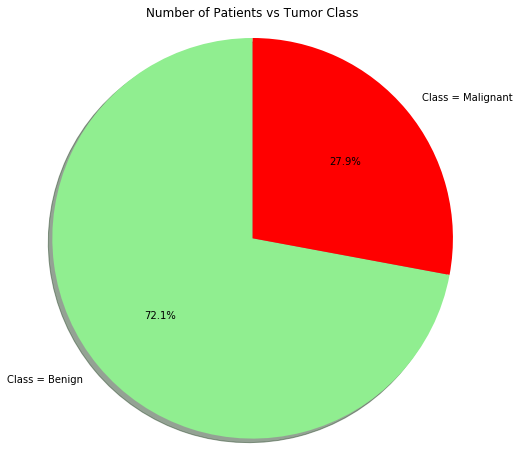

In [7]:
# Data to plot
plt.figure(figsize = (8,8))
labels = 'Class = Benign', 'Class = Malignant'
plt.title('Number of Patients vs Tumor Class')
sizes = [number_benign, number_malignant]
colors = ['lightgreen', 'red']

# Plot pie chart
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Understanding Individual Distributions

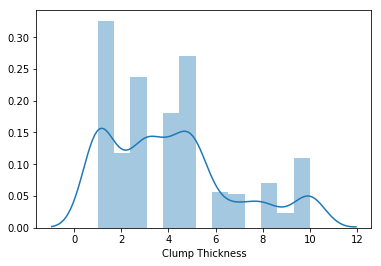

In [8]:
sns.distplot(data['Clump Thickness'])

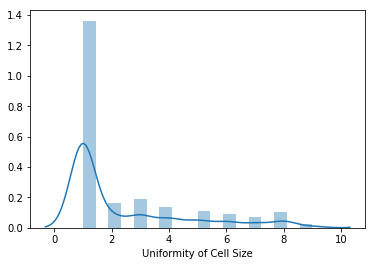

In [9]:
sns.distplot(data['Uniformity of Cell Size'])

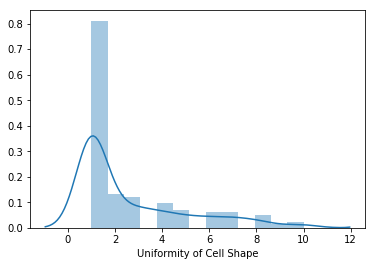

In [10]:
sns.distplot(data['Uniformity of Cell Shape'])

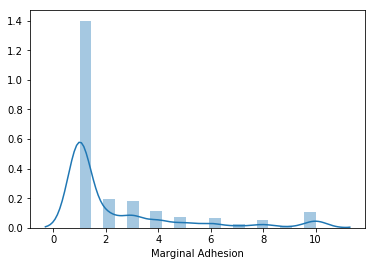

In [11]:
sns.distplot(data['Marginal Adhesion'])

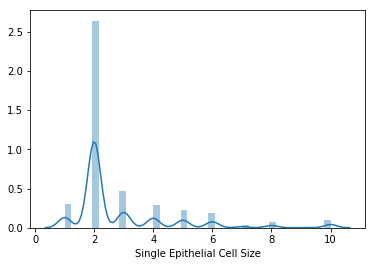

In [12]:
sns.distplot(data['Single Epithelial Cell Size'])

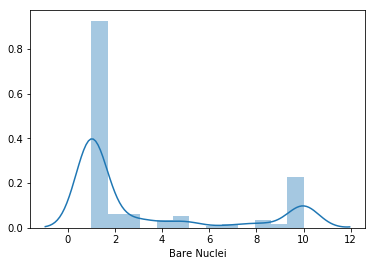

In [13]:
sns.distplot(data['Bare Nuclei'])

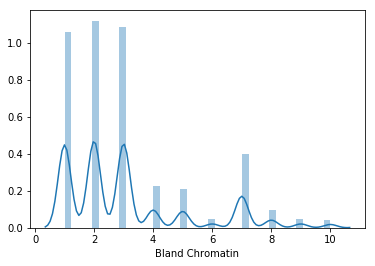

In [14]:
sns.distplot(data['Bland Chromatin'])

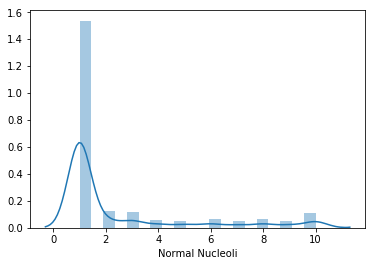

In [15]:
sns.distplot(data['Normal Nucleoli'])

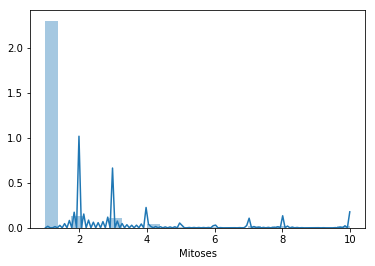

In [16]:
sns.distplot(data['Mitoses'])

### Correlation matrix output shows following behaviour:

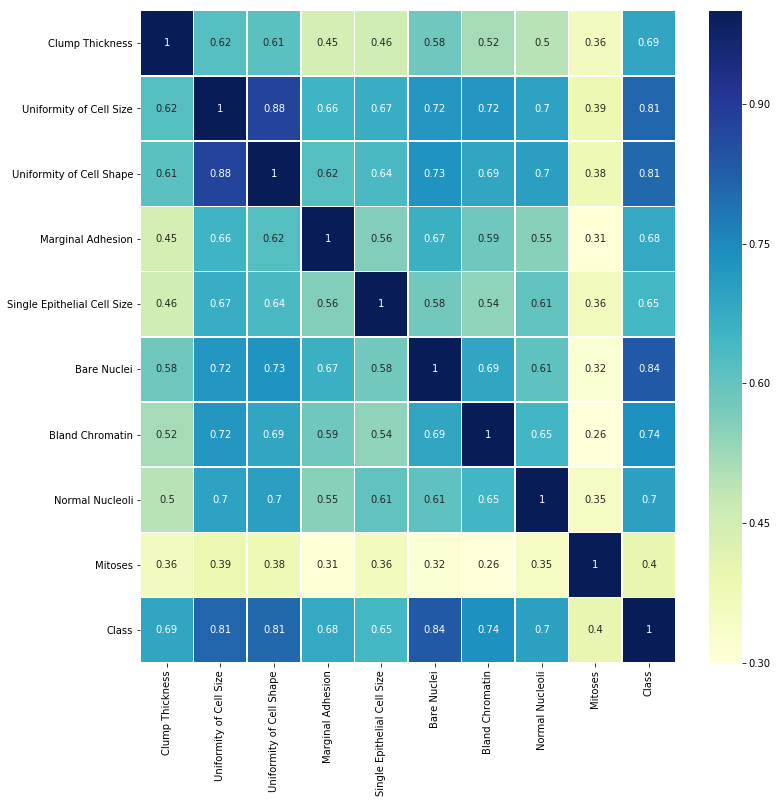

In [17]:
correlation = data.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=0.3, cmap="YlGnBu")

In [18]:
# Train Test split

# Select 80% for training
data_train = data.sample(frac = 0.8)
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["Class"])

# Select rest of data for testing
data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["Class"])

# Show number of training and testing data points
print("Number of Training data points: ", len(x_train))
print("Number of Testing data points: ", len(x_test))

Number of Training data points:  493
Number of Testing data points:  123


# Task 2:  Implementing the models

### Implementation - Logistic regression using gradient descent

In [19]:
# Compute sigmoid over a matrix of values (element wise)
sigma = lambda y: np.array(list(map(lambda x: 1/(1+np.exp(-x)), y)))

'''
LogisticRegression Class:
This class implements logistic regression model with following attributes and methods:
  Attributes:
    1. Weights matrix
    2. Mean of Training data
    3. Standard Deviation of Training data
  Methods:
    1. __init__: Initialize weights matrix
    2. normalize_data: Normalizes data using Training data's mean and standard deviation
    3. fit: Perform training on Train dataset.
    4. predict: Perform testing using Test dataset 
'''
class LogisticRegression:
    
    def __init__(self, initial_weights):
        '''
        Constructor
         Inputs: Initial weights
        '''
        
        self.w = initial_weights
        self.x_train_mean = np.nan
        self.x_train_std = np.nan
        pass
    
    
    def normalize_data(self, x, from_train = False):
        '''    
        Function to Normalize data
         Inputs:
          x: Input data (Training or Testing dataset)
          from_train: If called from training code (True), the mean and Standard Deviation are noted for use with Test data.
         Outputs:
          Normalized data
        '''
        
        # Save Training mean and SD.
        # Test data must be normalized using Training Mean and Training SD,
        # because of the i.i.d assumption
        if from_train:
            self.x_train_mean = np.mean(x, axis = 0)
            self.x_train_std = np.std(x,axis = 0)
        
        # Return normalized values
        return (x - self.x_train_mean)/self.x_train_std
    
    
    def fit(self, x_train, y_train, alpha, iters, stop_criteria, normalize = True):
        '''    
        Function to perform Training
         Inputs: 
          x_train: Training data - input features
          y_train: Training data - targets
          alpha: Learning rate
          iters: Maximum number of Iterations if not converged
          stop_criteria: Lowest allowed norm of "change in weights" (Stopping criteria)
          normalize: should data be normalized?
         Output:
          List of cross entropy losses

        '''
        
        # Normalize data if requested. Save the Training mean and SD
        if normalize:
            x_train = self.normalize_data(x_train, from_train = True)
        
        # Convert y_train to 2D matrix
        y_train = y_train[np.newaxis]
        
        # Maintain a list of cross entropy losses
        ce_losses = []
        
        # Small value to prevent Log(0) situation
        epsilon = 1e-8
        
        # Iterations of Weight updates
        for iterate in range(iters):
            
            # Cross Entropy calculation
            ce = -1*(\
                     y_train.dot(np.log(sigma(self.w.T.dot(x_train.T)).T+epsilon)) + \
                     (1 - y_train).dot(np.log(1-sigma(self.w.T.dot(x_train.T)).T+epsilon))\
                    )
            
            # Gradient calc - Change in weights
            deltaW = x_train.T.dot((y_train - sigma(self.w.T.dot(x_train.T))).T)
            
            # Update list of losses
            ce_losses = ce_losses + ce.flatten().tolist()
            
            # Weight update equation
            self.w += alpha*deltaW
            
            # Check if norm of deltaW is lower than stopping criteria
            # if yes, stop
            if np.linalg.norm(deltaW) < stop_criteria:
                print("Number of iterations: ", iterate)
                break
        return ce_losses

    
    def predict(self, x_test, normalize = True):
        '''
        Function to predict classes using given input features
         Inputs:
          x_test: Test dataset input features
          normalize: Should data be normalized?
         Outputs:
          y_pred: Predicted classes corresponding to input records
        '''
        
        if normalize:
            x_test = self.normalize_data(x_test)
        
        # Calculate predicted class
        y_pred = 1*(self.w.T.dot(x_test.T) > 0.5)
        
        return y_pred
    
# Function to evaluate accuracies
def evaluate_acc(y_test, y_pred):
    return np.mean(y_test == y_pred)

### Results of LR on test dataset

In [20]:
# Initializing weights
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T

# Performing logistic regression training
reg = LogisticRegression(w)
f = reg.fit(x_train,y_train,0.001,20000, 0.001)

# Predicting results on test dataset
y_pred = reg.predict(x_test)

# Evaluating accuracy
lr_init_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LR on test dataset: ",lr_init_features, "%")

Number of iterations:  6580
Accuracy of LR on test dataset:  95.1219512195122 %


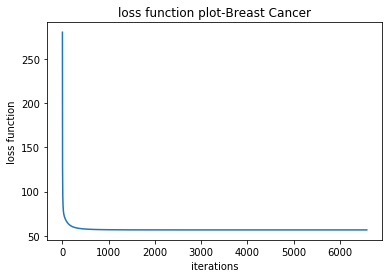

In [21]:
# Plot Cross Entropy loss from validation on Test dataset
plt.title('loss function plot-Breast Cancer')
plt.xlabel('iterations'), plt.ylabel('loss function')
plt.plot(f)
plt.show()

###  Linear discriminant analysis

In [22]:
# Implementation of LDA in a class
class LDA():
    """
    Class to that implements LDA from scratch
    """
    
    def __init__(self):
        """
        Initializing the required libraries to null.
        """
        pass
    
    def fit(self, x_train, y_train, alpha=None, iters=None, stop_criteria=None):
        """
        Function learns the parameters of the LDA model.
        Input features: x_train, input labels: y_train
        """
        self.Py0 = np.sum(y_train==0)/y_train.shape[0]
        self.Py1 = np.sum(y_train==1)/y_train.shape[0]
        self.mu0 = x_train.T @ (y_train==0) / np.sum(y_train==0)
        self.mu1 = x_train.T @ (y_train==1) / np.sum(y_train==1)
        self.sigma = np.zeros((x_train.shape[1], x_train.shape[1]))
        
        for i in range(x_train.shape[0]):
            self.sigma = self.sigma + (y_train[i]==0) * np.outer(x_train[i]-self.mu0,x_train[i]-self.mu0)
            self.sigma = self.sigma + (y_train[i]==1) * np.outer(x_train[i]-self.mu1,x_train[i]-self.mu1)
        self.sigma = self.sigma / (y_train.shape[0]-2)
        
        pass
    
    def predict(self, Xtest):
        """
        Function that takes training features as input
        """
        self.w0 = np.log(self.Py1) - np.log(self.Py0) \
             + 0.5 * (np.expand_dims(self.mu0, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu0, axis=1)) \
             - 0.5 * (np.expand_dims(self.mu1, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu1, axis=1))
        self.w1 = np.linalg.inv(self.sigma) @ (self.mu1-self.mu0)
        y = self.w0 + Xtest @ self.w1
        y = y>0
        return y[0]

### Validation of LDA using Test dataset

In [23]:
# Initialize weights
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T

# Perform LDA Training
lda = LDA()
f = lda.fit(x_train,y_train)

# Predicting results on test dataset
y_pred = lda.predict(x_test)

# Evaluating accuracy on test dataset
lda_init_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LDA on test dataset: ", lda_init_features, "%")

Accuracy of LDA on test dataset:  95.1219512195122 %


## Task 3: Running the experiments

### Implementing k-fold cross validation

In [24]:


# Example usage of cross_validation:
#   cross_validation(Reg, 4, x_train, y_train, 0.003, 200)

def cross_validation(Reg, k, x_train, y_train, alpha=None, iters=None, stop_criteria=None):
    """
    To perform cross validation
     Inputs:
        Reg : Regressor term
        k : Number of folds
        x_train : Training input data
        y_train : Training target data
        alpha : For Logistic Regression, Learning rate. Otherwise None.
        iters: For Logistic Regression, Number of iterations. Otherwise None.
        stop_criteria: For Logistic Regression, Stopping criteria. Otherwise None.
     Outputs:
        Accuracy on cross validation
    """
    
    # Number of samples (approx) in each fold
    fold_size = int(len(x_train)/k)
    
    # accuracies from different folds
    cross_validation_accuracies = 0
    
    # Evaluate for each fold
    for fold_number in range(k):
        
        # Index of start of fold
        val_start = fold_number*fold_size
        
        # Index of end of fold
        val_end = val_start + fold_size
        
        # For last fold, consider validation data from start of last fold till end of data 
        # (may include more than approx fold size)
        # For other folds, evaluate from start of the fold
        if fold_number == (k-1):
            # Validation data for last fold
            x_val_fold = x_train[val_start:,:]
            y_val_fold = y_train[val_start:]
            
            # Training data for other folds
            x_train_fold = x_train[:val_start,:]
            y_train_fold = y_train[:val_start]
        else:
            # Validation data for Nth fold
            x_val_fold = x_train[val_start:val_end,:]
            y_val_fold = y_train[val_start:val_end]
            
            # Training data for other folds
            x_train_fold = np.concatenate((x_train[:val_start,:],x_train[val_end:,:]),axis = 0)
            y_train_fold = np.concatenate((y_train[:val_start],y_train[val_end:]))
        
        # Training on other folds
        f = Reg.fit(x_train_fold, y_train_fold, alpha, iters, stop_criteria)
        
        # Predictions on Validation fold
        y_pred_fold = Reg.predict(x_val_fold)
        
        # Evaluate accuracy for each fold
        cross_validation_accuracies += evaluate_acc(y_val_fold, y_pred_fold)
        
    # Take mean of Validation accuracies in all folds
    cross_validation_accuracies /= k
    
    return cross_validation_accuracies

### Experiment 1: Test different learning rates for logistic regression

Text(0,0.5,'cross validation accuracy')

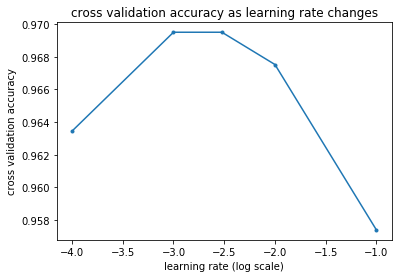

In [25]:
# Vector of learning rates to explore
lr_vec = [.0001, .001, 0.003, 0.01, 0.1]

# Vector to record Cross validation accuracies
cv_acc = []

# For each learning rate
for lr in lr_vec:
    
    # Initialize weights
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    
    # Create LR model, perform cross validation and update Cross validation vector
    reg = LogisticRegression(w)
    cv_acc.append(cross_validation(reg, 5, x_train, y_train, lr, 20, 0.001))
    
# Plot log scale of Cross validation accuracies
plt.plot(np.log10(lr_vec), cv_acc, '.-')
plt.title('cross validation accuracy as learning rate changes')
plt.xlabel('learning rate (log scale)')
plt.ylabel('cross validation accuracy')

###  Experiment 2: Compare the runtime and accuracy of LDA and logistic regression

In [26]:
import time
start_time = time.time()

# Execute Cross validation 5 times on LR
for i in range(5):
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    Acc=cross_validation(reg, 5, x_train, y_train, lr, 20, 0.0001)

print('Time to run logistic regression 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(Acc*100))
print("\n")
# Reset start time
start_time = time.time()

# Execute Cross validation 5 times on LDA
for i in range(5):
    reg = LDA()
    ACC=cross_validation(reg, 5, x_train, y_train)

print('Time to run LDA 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(ACC*100))

Time to run logistic regression 5 times: 0.09294271469116211 seconds
The average accuracy after k-fold cross validation is 95.73853303697717 %


Time to run LDA 5 times: 0.39687228202819824 seconds
The average accuracy after k-fold cross validation is 95.76278035966862 %


# Results Summary

In [27]:
print("Accuracies on Test dataset: ")
print("Logistic Regression: ", lr_init_features, "%")
print("Linear Discriminant Analysis: ", lda_init_features, "%")

Accuracies on Test dataset: 
Logistic Regression:  95.1219512195122 %
Linear Discriminant Analysis:  95.1219512195122 %
